# COGS 108 - Final Project 

# Overview

For our COGS 108 project, we decided to analyze the crime rates on American (federal) holidays in Los Angeles. This city in particular was chosen by us since it contained a moderate amount of entries while having enough data to work with. We predicted that the rate of crime in Los Angeles would increase during these holidays.

# Names 
**Group Name**
- PSYCPD

**Group Members' Names**
- Vivian Pham
- Denzel Rodil
- Aaron Truong
- Angela Zhu
- Gigi Li
- Rui Qin


# Research Question

***What is the influence of major (Federal mandated) holidays on crime rates in Los Angeles from 2015 to 2018?***
- The variable we are measuring is the date of each month regardless of whether there is an American (government mandated) holiday or not. We considered other variables such as gender and type of crime committed but concluded that including them would create a different project in itself. Since our topic is very broad, additional variables would only be needed for specific and unrelated topics. We also did not include holidays that were not mandated by the government such as Halloween and Valentine’s Day but we included them in our analysis.


## Background and Prior Work

Our dataset was obtained from a crime data census, that started in 2010 to present day, for Los Angeles. Originally, we planned to take a look to see if the time of year circulating around major holidays has a relationship with the crime rates in Los Angeles. There have been studies done in the past that look at the effect of different factors such as religion or seasons on the crime rate. In an article by Matthew Lee, they take a look into the influence of religious institutions on crime in rural areas. In another article by David McDowall about the seasonal cycle of crime, which found that there are in fact patterns and seasonal behaviors for major crime rates. Continuing the investigation of seasonality and religion on crime rates, our group wanted to explore if federal holidays, where many have time off, also influence the rate of crime in Los Angeles.

We chose to use federal holidays, and did not decide to use religious holidays such as Easter or Kwanzaa, since there are many people of different religious beliefs (so the choice of including certain religious would marginalize large groups of people), nor did we choose to use other public holidays like Halloween, since most people do not get time off on those days. These federal holidays should also be recognized by all 50 states so that if we wanted to expand our analysis, we did not need to account for holidays recognized by some states and not others. The list of US federal holidays are:

- New Year’s Day (January 1)
- Birthday of Martin Luther King, Jr. (3rd Monday in January)
- Washington’s Birthday (3rd Monday in February)
- Memorial Day (last Monday in May)
- Independence Day (July 4)
- Labor Day (1st Monday in September)
- Columbus Day (2nd Monday in October)
- Veterans Day (November 11)
- Thanksgiving Day (4th Thursday in November)
- Christmas Day (December 25)

References (include links):
- 1) Matthew R. Lee, The Religious Institutional Base and Violent Crime in Rural Areas, https://www.jstor.org/stable/3838287?Search=yes&resultItemClick=true&searchText=crime&searchText=rates&searchText=on&searchText=major&searchText=holidays&searchUri=%2Faction%2FdoBasicSearch%3Facc%3Doff%26amp%3Bgroup%3Dnone%26amp%3Bwc%3Don%26amp%3BQuery%3Dcrime%2Brates%2Bon%2Bmajor%2Bholidays%26amp%3Bfc%3Doff&ab_segments=0%2Fdefault-2%2Fcontrol&refreqid=search%3A2058996b1f52923be5dbd27c54485e1e&seq=1#page_scan_tab_contents
- 2) David McDowall, Seasonal Cycles in Crime, and Their Variability, https://www.jstor.org/stable/43551937?Search=yes&resultItemClick=true&searchText=crime&searchText=rates&searchText=on&searchText=major&searchText=holidays&searchUri=%2Faction%2FdoBasicSearch%3Facc%3Doff%26amp%3Bgroup%3Dnone%26amp%3Bwc%3Don%26amp%3BQuery%3Dcrime%2Brates%2Bon%2Bmajor%2Bholidays%26amp%3Bfc%3Doff&ab_segments=0%2Fdefault-2%2Fcontrol&refreqid=search%3A2058996b1f52923be5dbd27c54485e1e&seq=1#page_scan_tab_contents

# Hypothesis


Our hypothesis was that there are more crimes committed on major (federal) holidays than on other days of the year (from 2015-2018).

We thought that the rate of crime would increase during the federal holidays because those opportunistic would want to commit the crimes during a time when most people aren’t working. If many people have work off during these federal holidays, we assumed that people who are planning to commit a crime would have an easier time doing so or have the time to do so.

# Dataset(s)

- Dataset Name: Crime Data from 2010 to Present
- Link to the dataset: https://catalog.data.gov/dataset/crime-data-from-2010-to-present
- Number of observations: 1,963,743 observations

-  For each crime record in the dataset, there are 26 fields: “DR Number”, “Date Reported”, “Date Occurred”,  “Time Occurred”, “Area ID”, 	“Area Name”, “Reporting District”, “Crime Code”,	“Crime Code Description”, “MO Codes”, “Victim Age”,	 “Victim Sex”,	 “Victim Descent”, “Premise Code”, “Premise Description”, “Weapon Used Code”, “Weapon Description”, “Status Code”,	“Status Description”,	“Crime Code 1”, “Crime Code 2”, “Crime Code 3”, “Crime Code 4”, “Address”, “Cross Street”, and “Location”. This dataset also specifically kept track of crimes only in the city of Los Angeles from 2010-to June 7th 2019, since it was transcribed from the original paper crime reports. As such, inaccuracies in the data are possible because of the transcriptions. Records with missing location fields are also noted as (0°, 0°) and address fields are approximated to the nearest hundred block to preserve people’s privacy. 

# Setup

Packages used for analysis: 

- Pandas
- Numpy
- Mathplotlib.pyplot
- Scipy
- statsmodels.api
- patsy
- datetime

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import patsy
import datetime as dt

# Data Cleaning

Import Data

In [41]:
df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")

The original dataset had nearly 2,000,000 entries with 26 variables: DR Number, Date Reported, Date Occurred, Time Occurred, Area ID, Area Name, Reporting District, Crime Code, Crime Code Description, MO Codes, Victim Age, Victim Sex, Victim Description, Premise Code, Premise Description, Weapon Use, Weapon Description, Status Code, Status Description, Crime Code 1, Crime Code 2, Crime Code 3, Crime Code 4, Address, Cross Street, and Location. 
As a result, the data cleaning we performed mainly involved removing variables that we did not need since we were only looking for the amount of crimes that occurred, when they occurred, and the type of crime they were. Consequently, after cleaning the variables for only what was necessary, we were left with “Date reported”, “Date Occured”, “Time Occurred”,  “Location”, “Crime Code”, “Crime Description”, “Area Name/ID”, “Reporting District”, and “DR Number”. We chose to focus on these variables because we believed they were vital in learning when, where, and what kinds of crimes are committed most often. As such, fields like “Victim Age”, “Victim Sex”, “Address”, “Cross Street”, “Weapons Used Code”, and “Weapon Description” would not affect our data analysis. 

In [42]:
df.drop(columns=['Area ID', 'MO Codes', 'Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Code', 
                 'Premise Description', 'Weapon Used Code', 'Weapon Description', 'Status Code', 
                 'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4',
                 'Address', 'Cross Street'], inplace=True)

In [43]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code,Crime Code Description,Location
0,11401303,09/13/2010,09/12/2010,45,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","(33.9599, -118.3962)"
1,70309629,08/09/2010,08/09/2010,1515,Newton,1324,946,OTHER MISCELLANEOUS CRIME,"(34.0224, -118.2524)"
2,100100508,01/08/2010,01/07/2010,2005,Central,182,330,BURGLARY FROM VEHICLE,"(34.0389, -118.2643)"
3,100100511,01/09/2010,01/06/2010,2100,Central,132,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0538, -118.2488)"
4,100100523,01/15/2010,01/15/2010,245,Central,182,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","(34.0409, -118.2609)"


Convert string variable "Date Occurred" to three numerical variable "Year", "Month", and "Day". And add a column of ones which represent one crime happened.

In [44]:
df["time"] = df["Date Occurred"].str.split('/')
df["Year"] = pd.to_numeric(df["time"].str[2])
df["Month"] = pd.to_numeric(df["time"].str[0])
df["Day"] = pd.to_numeric(df["time"].str[1])
df.drop(columns=["time"], inplace = True)
df["date"] = df[["Month", "Day", "Year"]].values.tolist()
df["Num"] = np.ones(df.shape[0])

Even after narrowing down the variables our group would analyze, we were left with a lot more data then we would need. In order for our code to work, we had to decrease the massive amount of data that was being processed and analyzed. So we further narrowed our inspection range of crime rates in Los Angeles to range from 2015 to 2018. This time period was chosen in order to have the most recent data and have our analysis focuses on the most recent crimes trends.


In [45]:
df = df.loc[(df["Year"] >= 2015) & (df["Year"] < 2019),:]

Define the holidays date as wrote above and create a column with boolean type to check if the day is a holiday.

In [46]:
Holi_2015 = ["01/01/2015", "01/19/2015", "02/16/2015", "05/25/2015", "07/04/2015", "09/07/2015", 
             "10/12/2015", "11/11/2015", "11/26/2015", "12/25/2015"]
Holi_2016 = ["01/01/2016", "01/18/2016", "02/15/2016", "05/30/2016", "07/04/2016", "09/05/2016", 
             "10/10/2016", "11/11/2016", "11/24/2016", "12/25/2016"]
Holi_2017 = ["01/01/2017", "01/16/2017", "02/20/2017", "05/29/2017", "07/04/2017", "09/04/2017", 
             "10/09/2017", "11/11/2017", "11/23/2017", "12/25/2017"]
Holi_2018 = ["01/01/2018", "01/15/2018", "02/19/2018", "05/28/2018", "07/04/2018", "09/03/2018", 
             "10/08/2018", "11/11/2018", "11/22/2018", "12/25/2018"]
holidays = Holi_2015 + Holi_2016 + Holi_2017 + Holi_2018
df["is_holiday"] = df["Date Occurred"].isin(holidays)

Calculate the average number of crimes per day in each month during four years and split the data into two groups: holidays and non-holidays.

In [47]:
num_crime_holiday_2 = df.groupby(["Year", "Month"]).sum().is_holiday.reset_index()
num_crime_holiday_2["time"] = num_crime_holiday_2["Year"].apply(str) +"/" + num_crime_holiday_2["Month"].apply(str)
mean_num_crime_holiday = []
for i in range(num_crime_holiday_2.shape[0]):
    if num_holidays[num_crime_holiday_2["Month"][i]-1] != 0:
        a = num_crime_holiday_2["is_holiday"][i]
        b = num_holidays[num_crime_holiday_2["Month"][i]-1]
        mean_num_crime_holiday.append(a/b)
    else:
        mean_num_crime_holiday.append(0)
num_crime_holiday_2["Average"] = mean_num_crime_holiday
num_crime_holiday_2 = num_crime_holiday_2[num_crime_holiday_2["is_holiday"] != 0]

In [48]:
num_crime_nonholiday_2 = df.groupby(["Year", "Month"]).sum().Num - df.groupby(["Year", "Month"]).sum().is_holiday
num_crime_nonholiday_2 = num_crime_nonholiday_2.reset_index()
num_crime_nonholiday_2.columns = ["Year", "Month", "Num"]
num_crime_nonholiday_2["time"] = num_crime_nonholiday_2["Year"].apply(str) +"/" + num_crime_nonholiday_2["Month"].apply(str)
mean_num_crime_nonholiday = []
for i in range(num_crime_nonholiday_2.shape[0]):
    a = num_crime_nonholiday_2["Num"][i]
    b = num_nonholidays[num_crime_nonholiday_2["Month"][i]-1]
    mean_num_crime_nonholiday.append(a/b)
num_crime_nonholiday_2["Average"] = mean_num_crime_nonholiday
num_crime_nonholiday_2 = num_crime_nonholiday_2[~num_crime_nonholiday_2["Month"].isin([3,4,6,8])]

Calculate the number of crimes on every day during these four years and split the data into two groups: holidays and non-holidays.

In [49]:
num_crime_holiday_3 = df.groupby(["Date Occurred"]).sum().is_holiday.reset_index()
num_crime_holiday_3 = num_crime_holiday_3[num_crime_holiday_3["is_holiday"] != 0]
num_crime_nonholiday_3 = df.groupby(["Date Occurred"]).sum().Num - df.groupby(["Date Occurred"]).sum().is_holiday
num_crime_nonholiday_3 = num_crime_nonholiday_3.reset_index()
num_crime_nonholiday_3.columns=(["Date Occurred", "Num"])
num_crime_nonholiday_3 = num_crime_nonholiday_3[num_crime_nonholiday_3["Num"] != 0]

Calculate the average number of crimes per day in each month (12 months in total) and split the data into two groups: holidays and non-holidays.

In [50]:
num_crime_holiday = df.groupby(["Month"]).sum().is_holiday
num_holidays = [2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1]
for i in range(1,13):
    if num_holidays[i-1] != 0:
        num_crime_holiday[i] = num_crime_holiday[i]/num_holidays[i-1]
num_crime_nonholiday = df.groupby(["Month"]).sum().Num - num_crime_holiday
num_nonholidays = [29, 27, 31, 30, 30, 30, 30, 31, 29, 30, 28, 30]
for i in range(1,13):
    num_crime_nonholiday[i] = num_crime_nonholiday[i]/num_nonholidays[i-1]
new_num_crime_holiday = num_crime_holiday.drop(labels=[3,4,6,8])
new_num_crime_nonholiday = num_crime_nonholiday.drop(labels=[3,4,6,8])
new_num_crime_holiday = new_num_crime_holiday/4
new_num_crime_nonholiday = new_num_crime_nonholiday/4

Test Normality of the number of crimes on every day during these four years

- The graph below shows the distribution of the number of crimes on holidays during these four years

Text(0, 0.5, 'frequency')

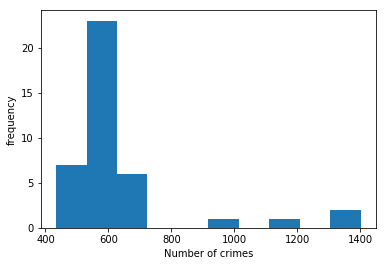

In [51]:
plt.hist(num_crime_holiday_3["is_holiday"])
plt.xlabel("Number of crimes")
plt.ylabel("frequency")

In [52]:
stats.normaltest(num_crime_holiday_3["is_holiday"])

NormaltestResult(statistic=39.047694599456534, pvalue=3.318186959469853e-09)

- The graph below shows the distribution of the number of crimes on non-holidays during these four years

Text(0, 0.5, 'frequency')

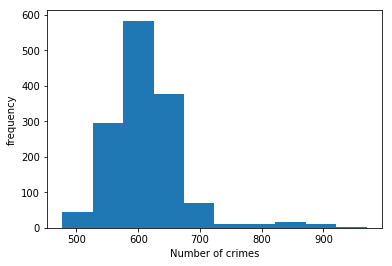

In [53]:
plt.hist(num_crime_nonholiday_3["Num"])
plt.xlabel("Number of crimes")
plt.ylabel("frequency")

In [11]:
stats.normaltest(num_crime_nonholiday_3["Num"])

NormaltestResult(statistic=566.779638671107, pvalue=8.421030397004243e-124)

Results of normality testing
- For number of crimes on holidays, since the p-value is less than the significance level 0.05, we reject the null hypothesis that the random variable is normally distributed.
- For number of crimes on non-holidays, since the p-value is less than the significance level 0.05, we reject the null hypothesis that the random variable is normally distributed.

# Data Analysis & Results

**Amount of crimes in LA (2015-2018)**

We graphed the amount of crimes that occurred by the date they were reported. We only listed all the months of 2015 since we were running into issues trying to fit everything from the four years in. Whenever we would try to include the other years, the kernel would break but we believe that each year experienced very similar trends. For each month of the year, we graphed the amount of crimes starting from the first day of the month to the last day. The most noticeable trend we found was that the first day of the month had the most amount of crimes for every month from 2015 to 2018. After the first day of each month, there would be a significant decrease then would continuously drop until the last day where the amount of crimes would reach the lowest amount for each month. We noticed that after the last day of the month, the first day into the next month would experience a significant increase in the amount of crimes by a few hundred and then continue the pattern again.

In [54]:
dates = {}

def groupby_year():
    # iterate over rows with iterrows()
    for index, row in df.iterrows():
        
        # Drop all whitespace
        date_occurred = row['Date Occurred'].strip()

        # Extract year
        year = date_occurred[-4:]

        if year in dates:
            dates[year].append(row)
        else:
            dates[year] = [row]

groupby_year()
def groupby_month(df):
    months = {}
    # iterate over rows with iterrows()
    for index, row in df.iterrows():
        
        # Drop all whitespace
        date_occurred = row['Date Occurred'].strip()

        # Extract year
        month = date_occurred[:2]

        if month in months:
            months[month].append(row)
        else:
            months[month] = [row]
    return months

In [55]:
crimes_2015_year = pd.DataFrame(data=dates['2015'])
crimes_2015_months = {}

# year 2015
crimes_2015_months = groupby_month(crimes_2015_year)
crimes_2015_01 = pd.DataFrame(data=(crimes_2015_months['01']))
crimes_2015_02 = pd.DataFrame(data=(crimes_2015_months['02']))
crimes_2015_03 = pd.DataFrame(data=(crimes_2015_months['03']))
crimes_2015_04 = pd.DataFrame(data=(crimes_2015_months['04']))
crimes_2015_05 = pd.DataFrame(data=(crimes_2015_months['05']))
crimes_2015_06 = pd.DataFrame(data=(crimes_2015_months['06']))
crimes_2015_07 = pd.DataFrame(data=(crimes_2015_months['07']))
crimes_2015_08 = pd.DataFrame(data=(crimes_2015_months['08']))
crimes_2015_09 = pd.DataFrame(data=(crimes_2015_months['09']))
crimes_2015_10 = pd.DataFrame(data=(crimes_2015_months['10']))
crimes_2015_11 = pd.DataFrame(data=(crimes_2015_months['11']))
crimes_2015_12 = pd.DataFrame(data=(crimes_2015_months['12']))

Crimes in 2015:

Text(0.5, 0, 'Date')

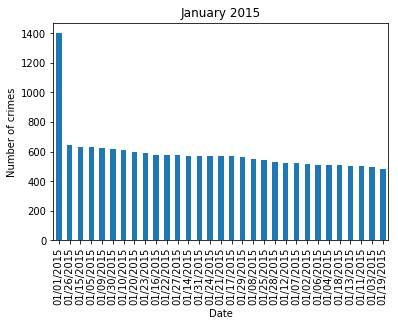

In [58]:
plt.figure()
crimes_2015_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

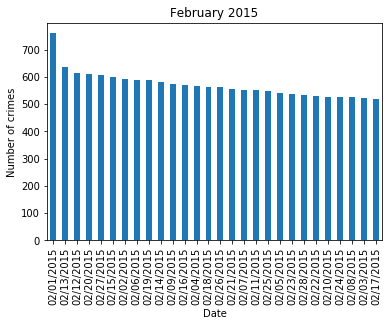

In [59]:
plt.figure()
crimes_2015_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

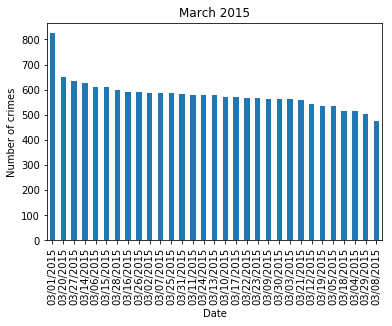

In [60]:
plt.figure()
crimes_2015_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

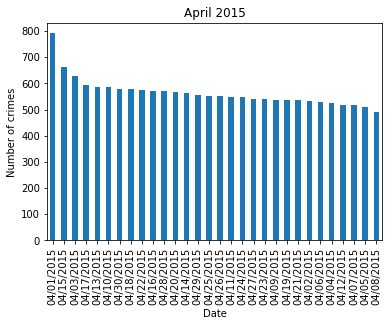

In [61]:
plt.figure()
crimes_2015_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

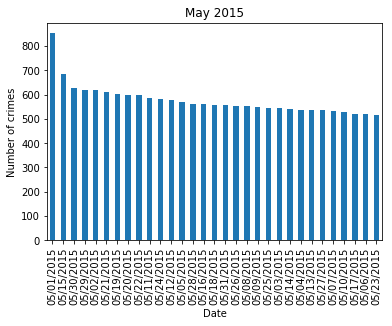

In [62]:
plt.figure()
crimes_2015_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

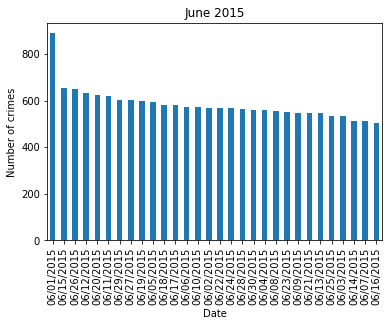

In [63]:
plt.figure()
crimes_2015_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

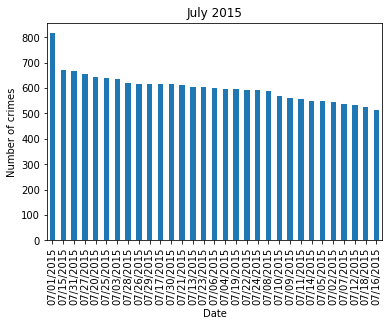

In [64]:
plt.figure()
crimes_2015_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

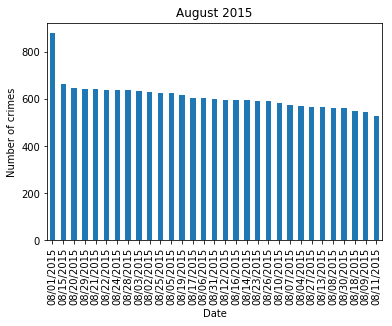

In [65]:
plt.figure()
crimes_2015_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

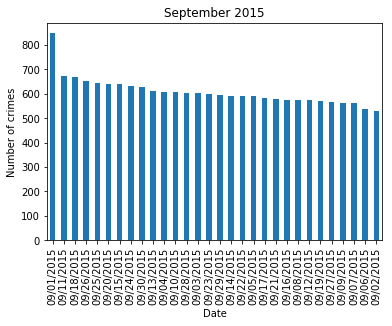

In [66]:
plt.figure()
crimes_2015_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

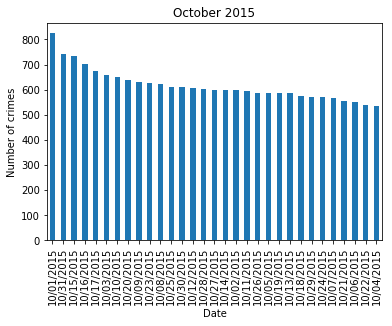

In [67]:
plt.figure()
crimes_2015_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

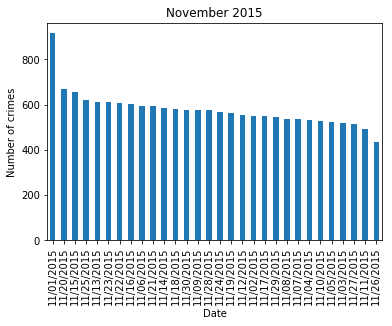

In [68]:
plt.figure()
crimes_2015_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

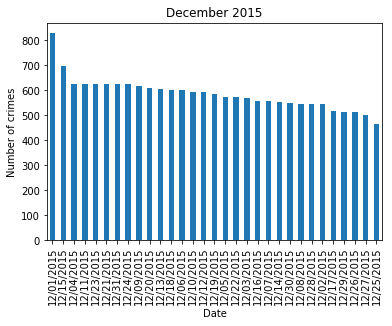

In [69]:
plt.figure()
crimes_2015_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2015')
plt.ylabel("Number of crimes")
plt.xlabel("Date")

Aside from New Years Day (January 1st), it did not appear that the rate of crime increased on American (federal) holidays. New Years Day was the only exception in this case where for each year, the city of Los Angeles experienced a dramatic increase in the amount of crimes that occurred on that day relative to any other day. There were over 1200 crimes committed during New Years, the highest amount of crimes that we saw for every year that we analyzed.

**Average number of crimes in LA on holidays vs non-holidays (2015-2018)**

- We graphed the mean number of crimes per month in Los Angeles on holidays versus on non holidays for all the months except March, April, June, and August. These months were excluded from the graph of the mean number of crime per month on holidays because they did not contain any holidays. The months were excluded from the graph of mean number of crime per month on non holidays because we needed the sizes of the two data sets to match in order to test them.

- The graph below shows the mean number of crimes per month in Los Angeles on holidays

Text(0, 0.5, 'Average number of crimes per day')

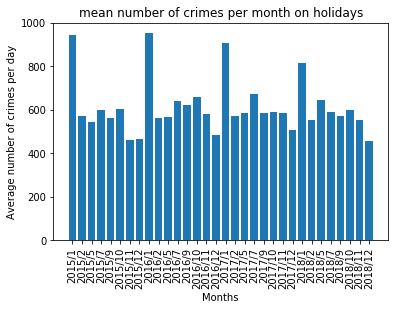

In [29]:
plt.bar(num_crime_holiday_2["time"], num_crime_holiday_2["Average"])
plt.title("mean number of crimes per month on holidays")
locs = plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Average number of crimes per day")

- The graph below shows the mean number of crimes per month in Los Angeles on non-holidays

Text(0, 0.5, 'Average number of crimes per day')

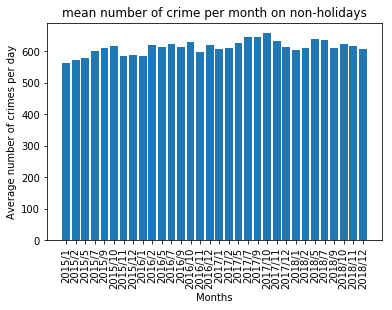

In [30]:
plt.bar(num_crime_nonholiday_2["time"], num_crime_nonholiday_2["Average"])
plt.title("mean number of crime per month on non-holidays")
locs = plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Average number of crimes per day")

With these two graphs we can see that holidays have little correlation to the number of crimes per month, however there is a specifically larger increase of number crimes on January of every year. Aside from that, there is not a noticeable difference in the other holidays.

**Wilcoxon ranked sum test on the number of crimes that happened every day of last 4 years**

Since the data is not normally distributed, we decided to utilize non-parametric testing such as Wilcoxon test
- Null hypothesis: the distribution of number of crimes on the holidays is the same as the distribution of number of crimes on the non holidays
- Alternative hypothesis: there is a shift between two distributions

In [37]:
stats.ranksums(num_crime_holiday_3["is_holiday"], num_crime_nonholiday_3["Num"])

RanksumsResult(statistic=-2.528366708779939, pvalue=0.011459458999327005)

Result of Wilcoxon ranked sum test:
- Since the p-value is less than the significance level 0.05, we reject the null hypothesis. However, the statistic suggests that the number of crimes that happened on holidays is actually not as many as crimes that happened on non-holidays

**Wilcoxon signed rank test on the average number of crimes that happened every day in each month (12 in total)**

- Null hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is 0.
- Alternative hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is not 0

The graph below shows the average number of crimes that happened on holidays in each months

Text(0, 0.5, 'Average number of crimes on holidays')

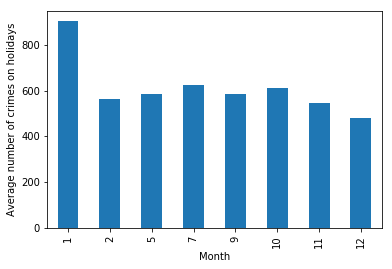

In [33]:
plt.figure()
new_num_crime_holiday.plot(kind="bar")
plt.ylabel("Average number of crimes on holidays")

The graph below shows the average number of crimes that happened on non-holidays in each months

Text(0, 0.5, 'Average number of crimes on non-holidays')

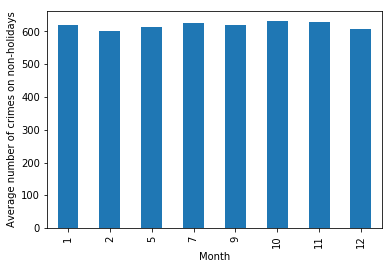

In [32]:
plt.figure()
new_num_crime_nonholiday.plot(kind="bar")
plt.ylabel("Average number of crimes on non-holidays")

With these two graphs we can see that holidays have little correlation to the number of crimes per month, however there is a specifically larger increase on New Years (January). Aside from that, there is not a noticeable difference in the other holidays.

In [15]:
stats.wilcoxon(list(new_num_crime_holiday), list(new_num_crime_nonholiday))

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=8.0, pvalue=0.16142946236708333)

- Result of the Wilcoxon signed rank test: Since the p-value is larger than the signficance level 0.05, we fail to reject the null hypothesis. Then the test sugguests that the difference between average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is around 0.

**The Monte Carlo Wilcoxon signed rank test**

Due to the limited size of data for Wilcoxon signed rank test, we decided to do the Monte Carlo Wilcoxon signed rank test.

- Null hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is 0
- Alternative hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is not 0

In [34]:
diff = new_num_crime_holiday - new_num_crime_nonholiday
w_rand = []
for b in range(10000):
    sign = np.random.choice([-1,1], 8)
    srank = stats.rankdata(abs(diff))*sign
    w_rand.append(srank[srank>0].sum())
prob_larger = np.mean(8 <= np.array(w_rand))
prob_smaller = np.mean(8 >= np.array(w_rand))
p_value = 2*min([prob_larger, prob_smaller])

To do the Monte Carlo Wilcoxon signed rank test, in each trial, we randomly sample the ranked data by randomly choose the sign. For the sampled data, we are able to compute the statistic for that trial. And we repeat this process for 10000 times to find the approximate distribution of statistic of Wilcoxon signed rank test. Comparing the statistic with this distribution, we find the p-value of our test

In [36]:
p_value

0.1954

- Result of the Wilcoxon signed rank test: Since the p-value is larger than the signficance level 0.05, we fail to reject the null hypothesis. Then the test sugguests that the difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is 0.

# Ethics & Privacy

Our primary source was data.gov which is open data given by the U.S. government itself but our dataset is listed as a Non-Federal dataset covered by different Terms of Use than Data.gov. The data is transcribed from original crime reports typed on paper (from the Los Angeles Police Department) so it was noted that there would be some possible inaccuracies with the data. Creative Commons (the organization publishing the dataset) states that they make no warranties regarding the use of their information and therefore allows us to use the dataset without any supervision. Address fields in the dataset were provided to the nearest hundred block to maintain privacy but for our analysis we did not use this information. Also because in this dataset, we are only analyzing crimes committed on US federal holidays versus random samples of other days, we are not highlighting certain religious holidays and the crime rates on those days so no profit would be directly made from our findings. However, an unintended consequence of these findings and data would be that it could easily be edited to change the holidays being analyzed to more religious ones, thus making it easier to single out certain religious holidays that would have higher crime rates even though religion may not have played a factor in the crime committed.

# Conclusion & Discussion

Our hypothesis was that there would be more crimes committed on major (federal) holidays than those on other days. We gathered and studied police reports from the city of Los Angeles from years 2015 to 2018. With our data and analysis we found out that there was little correlation between major holidays and the number of crimes committed. Comparing the amount of crimes that occurred on federal holidays to the average per day for its month, there was no significant difference in the crime rate. Although we could not find a correlation between crime and most of the major holidays we listed, we did find that first of January every year had the most amount of crimes compared to every other day of that year. We think the reasoning for this is that New Year is one of the most universally celebrated holidays of the year with large scale celebrations and alcohol. Driving under the influence and public intoxication are much more common after parties, so it would be likely that the amount of similar crimes would contribute to the high amount of crime during this day in Los Angeles. 

A limitation we had with our analysis was the subject that we chose. We wanted to analyze whether or not crimes would occur more often during federal holidays in Los Angeles. We were worried that the topic itself was very broad as we were just comparing the amount of crime that occurs on holidays to the rest of the days that weren’t holidays. However, we spoke with the professor about this limitation and she said that our nonparametric approach was good. We followed up with her answer afterwards by asking whether we should specify certain details such as the crime’s locations but we were given the creative freedom of deciding this issue. We felt that the data we had already was more than enough to analyze, so we did not go through with adding any extra specifications.

Another possible limitation of our analysis discussed was that we chose to only include US federal holidays which consist of New Year’s Day, Martin Luther King Day, Washington’s Birthday, Memorial Day, Independence Day, Labor Day, Columbus Day, Veterans Day, Thanksgiving Day, and Christmas Day. This decision was made because on these holidays, most employees are designated time off on, unlike other public holidays like Halloween or more religious holidays like Easter or Kwanzaa, though not necessarily all employers are required to give their workers days off then. 